Možná varianta
~~použít CartesianGrid a do něj dát hill function: https://math.stackexchange.com/questions/1190183/algorithm-to-generate-a-hill a nechat řešit F-K rovnici ve standardním tvaru, nepoužívat tu radiálně symetrickou forrmu~~

naopak, musím použít tu symetrickou formu. Otázka je, jestli je třeba zadavát počáteční podmínku na symerickém PolarGrid ...??

In [1]:
# from pde import PDE,DiffusionPDE, ScalarField, SphericalGrid, PolarGrid
import pde
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [10, 10]

In [2]:
#parametry

max_radius = 5
steps = 128

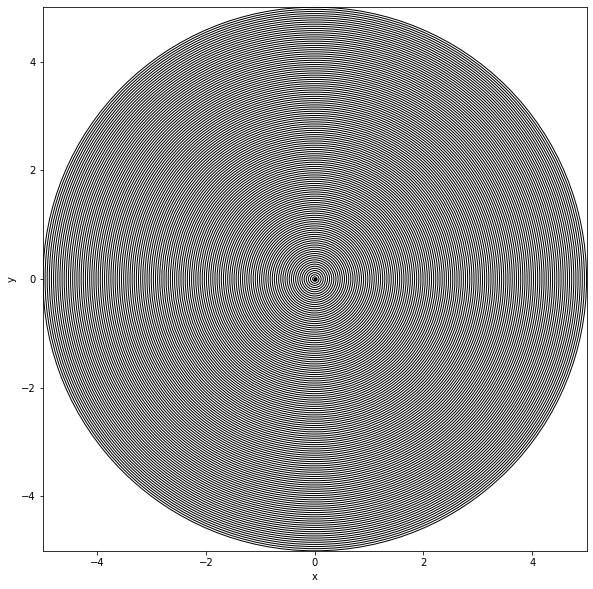

In [3]:
# příprava gridu na diskretizaci

grid = pde.PolarGrid(radius=max_radius, shape=steps)     #https://py-pde.readthedocs.io/en/latest/packages/pde.grids.html#pde.grids.spherical.PolarGrid
grid.plot(action='show')


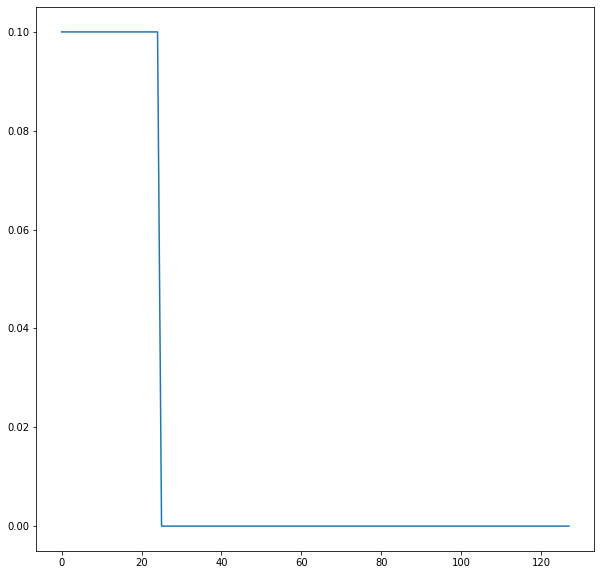

In [5]:
# příprava počáteční podmínky
# použita bump function: https://en.wikipedia.org/wiki/Bump_function


x = np.linspace(0,0.999,int(steps/max_radius))
data = np.zeros(steps)
data[:int(steps/max_radius)] = .1#np.exp(-1/(1-(x)**2))
state = pde.ScalarField(grid,data)
plt.plot(state.data)

In [ ]:
# počáteční podmínka na CartesianGrid

x = np.linspace(0,0.999,int(steps/max_radius))
data = np.zeros(steps)
data[:int(steps/max_radius)] = .1#np.exp(-1/(1-(x)**2))
state = pde.ScalarField(grid,data)
plt.plot(state.data)

Simulation aborted at t=0.9500000000000001 (Field was not finite)


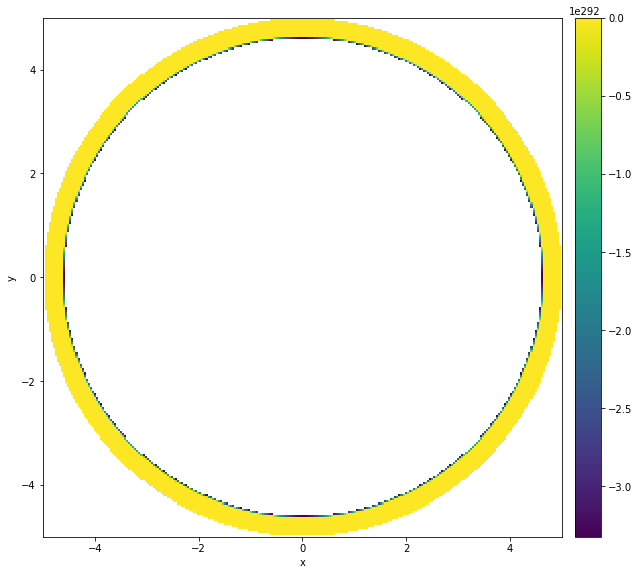

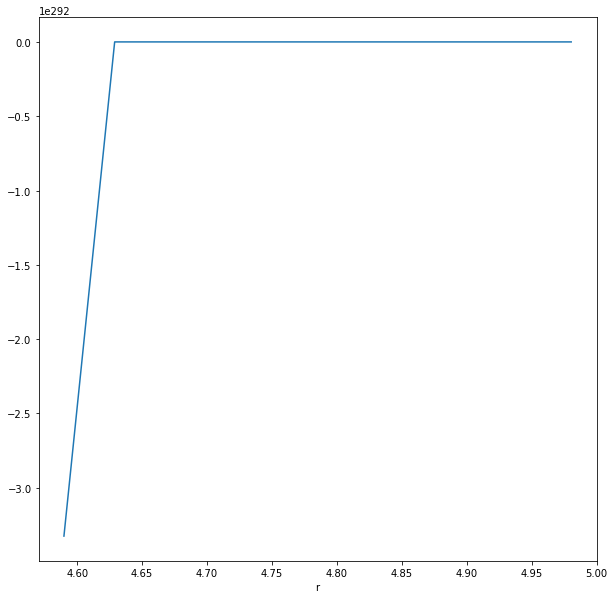

In [6]:
#eq = pde.PDE({'u': 'laplace(u)+1/r*gradient(u)+u*(1-u)'})

#1/r * gradient(u) + 
eq = pde.PDE(
    {"u": "laplace(u) + u*(1-u)"},
#    user_funcs={"get_r": lambda arr: arr[0]},
)


result = eq.solve(state, t_range=1, dt=0.01)
#eq.solve(state, t_range=2, dt=0.005)

# create movie from stored data
#movie_scalar(storage, "fk.mov")

result.plot(action="show", kind='image')
result.plot(action='show')






In [22]:
plt.rcParams['figure.figsize'] = [10, 10]

grid = PolarGrid(radius=[0, 1], shape=228)  # generate grid
#state = ScalarField.random_uniform(grid)  # generate initial condition
state = ScalarField.from_expression(grid, 'exp(-1/(1-r**2))')

<ipython-input-19-0abcc911237d>:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(np.exp(-1/(1-x**2)))


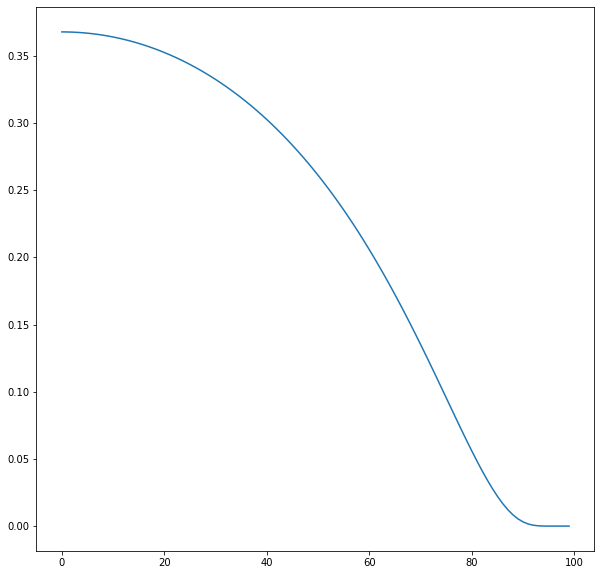

In [19]:
x = np.linspace(0,1,100)
plt.plot(np.exp(-1/(1-x**2)))

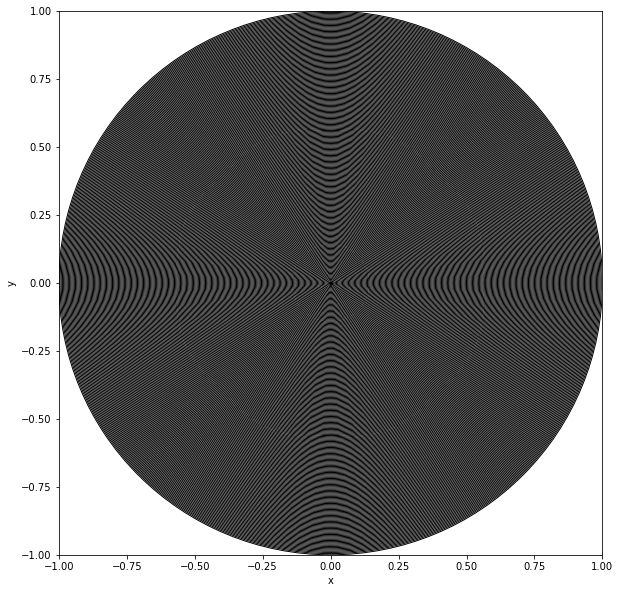

In [10]:
grid.plot(action='show')

#plt.plot(state.data)

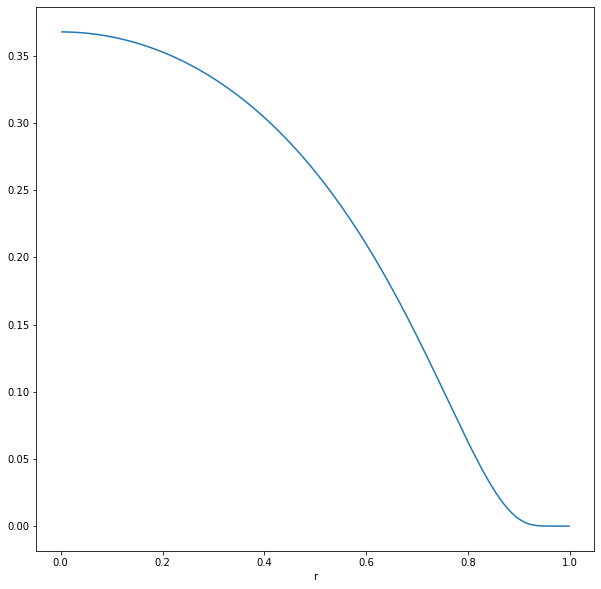

In [23]:
state.plot(action='show')

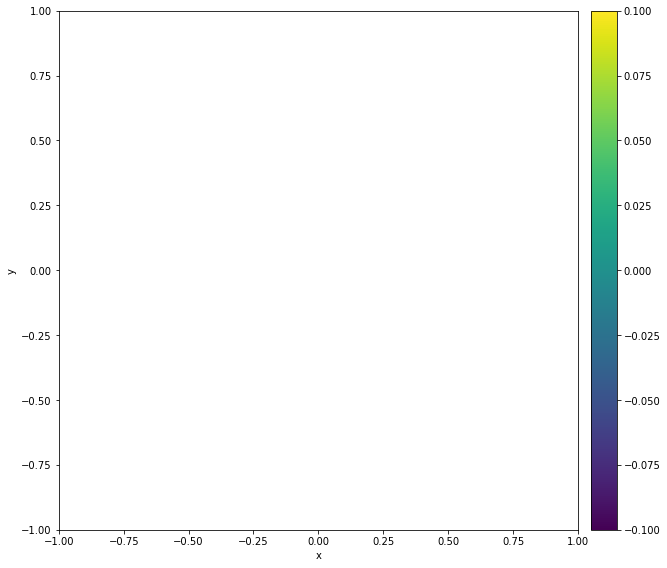

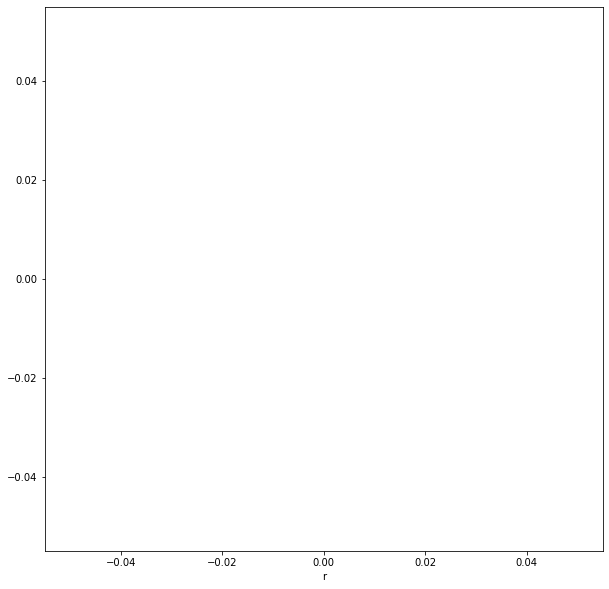

In [25]:
#storage = MemoryStorage()  # create storage
#tracker = storage.tracker(interval=1)  # create associated tracker

#eq = DiffusionPDE(0.1)  # define the PDE
eq = PDE({'u': 'laplace(u)+u*(1-u)'})
result = eq.solve(state, t_range=.01, dt=0.0001)
#eq.solve(state, t_range=2, dt=0.005)

# create movie from stored data
#movie_scalar(storage, "fk.mov")

result.plot(action="show", kind='image')
result.plot(action='show')

In [19]:
from pde import DiffusionPDE, MemoryStorage, ScalarField, UnitGrid, movie_scalar

grid = UnitGrid([16, 16])  # generate grid
state = ScalarField.random_uniform(grid, 0.2, 0.3)  # generate initial condition

storage = MemoryStorage()  # create storage
tracker = storage.tracker(interval=1)  # create associated tracker

eq = DiffusionPDE()  # define the physics
eq.solve(state, t_range=2, dt=0.005, tracker=tracker)

# create movie from stored data
movie_scalar(storage, "diffusion.mov")

Output()

AttributeError: 'Line2D' object has no property 'method'

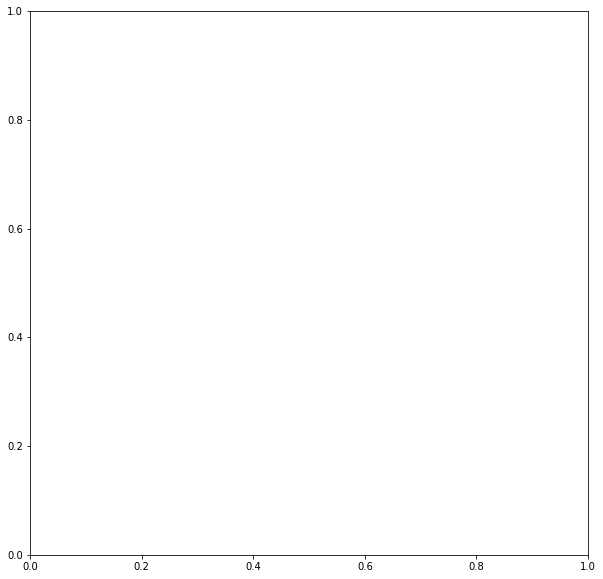

In [36]:
from pde import PDE,DiffusionPDE, ScalarField, SphericalGrid
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

grid = SphericalGrid(radius=[0, 5], shape=228)  # generate grid
state = ScalarField.random_uniform(grid)  # generate initial condition

#storage = MemoryStorage()  # create storage
#tracker = storage.tracker(interval=1)  # create associated tracker

#eq = DiffusionPDE(0.1)  # define the PDE
eq = PDE({'u': 'laplace(u)+u*(1-u)'})
result = eq.solve(state, t_range=2, dt=0.0001)
#eq.solve(state, t_range=2, dt=0.005)

# create movie from stored data
#movie_scalar(storage, "fk.mov")
result.plot(method='streamplot')
result.plot(action="show", kind='image')
result.plot(action='show')

In [35]:
from math import pi

from pde import PDE, CartesianGrid, MemoryStorage, ScalarField, plot_kymograph

# initialize the equation and the space
#eq = PDE({"u": 'get_r(gradient(get_r(gradient(u)))+1/r*get_r(gradient(u))+u*(1-u)'},user_funcs={"get_r": lambda arr: arr[0]},)
eq = PDE({"u": 'u*(1-u)'},user_funcs={"get_r": lambda arr: arr[0]},)
grid = CartesianGrid([[0, 2 * pi]], [32], periodic=True)
state = ScalarField.from_expression(grid, "sin(x)")

# solve the equation and store the trajectory
storage = MemoryStorage()
eq.solve(state, t_range=3, tracker=storage.tracker(0.1))

# plot the trajectory as a space-time plot
plot_kymograph(storage)

ValueError: need at least one array to concatenate

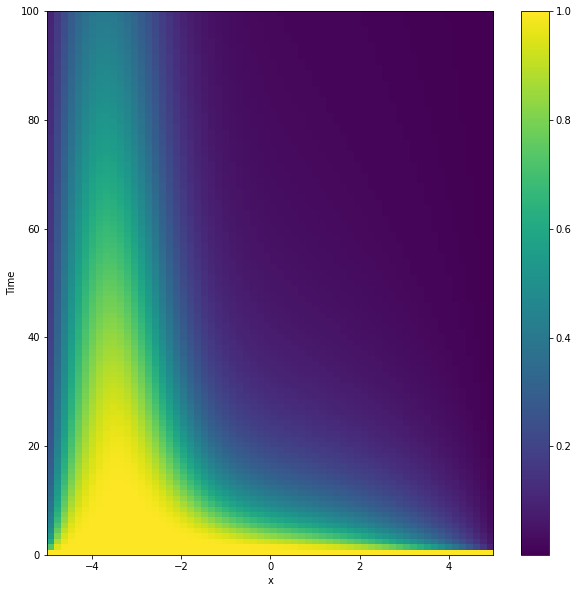

In [27]:
from pde import PDE, CartesianGrid, MemoryStorage, ScalarField, plot_kymograph

# Expanded definition of the PDE
diffusivity = "1.01 + tanh(x)"
term_1 = f"({diffusivity}) * laplace(c)"
term_2 = f"dot(gradient({diffusivity}), gradient(c))"
eq = PDE({"c": f"{term_1} + {term_2}"}, bc={"value": 0})


grid = CartesianGrid([[-5, 5]], 64)  # generate grid
field = ScalarField(grid, 1)  # generate initial condition

storage = MemoryStorage()  # store intermediate information of the simulation
res = eq.solve(field, 100, dt=1e-3, tracker=storage.tracker(1))  # solve the PDE

plot_kymograph(storage)  # visualize the result in a space-time plot

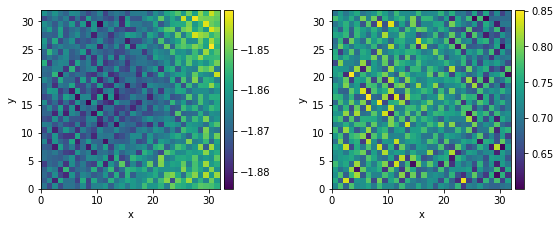

In [28]:
from pde import FieldCollection, PDEBase, UnitGrid


class FitzhughNagumoPDE(PDEBase):
    """ FitzHugh–Nagumo model with diffusive coupling """

    def __init__(self, stimulus=0.5, τ=10, a=0, b=0, bc="natural"):
        self.bc = bc
        self.stimulus = stimulus
        self.τ = τ
        self.a = a
        self.b = b

    def evolution_rate(self, state, t=0):
        v, w = state  # membrane potential and recovery variable

        v_t = v.laplace(bc=self.bc) + v - v ** 3 / 3 - w + self.stimulus
        w_t = (v + self.a - self.b * w) / self.τ

        return FieldCollection([v_t, w_t])


grid = UnitGrid([32, 32])
state = FieldCollection.scalar_random_uniform(2, grid)

eq = FitzhughNagumoPDE()
result = eq.solve(state, t_range=100, dt=0.01)
result.plot()

In [11]:
from pde import CartesianGrid, DiffusionPDE, ScalarField

grid = CartesianGrid([[-1, 1], [0, 2]], [30, 16])  # generate grid
state = ScalarField(grid)  # generate initial condition
state
#state.add_interpolated([1, 2], 1)
#state.plot(action='show')
#eq = DiffusionPDE(0.1)  # define the pde
#result = eq.solve(state, t_range=1, dt=0.01)
#result.plot(action='show',cmap="magma")

ScalarField(grid=CartesianGrid(bounds=((-1.0, 1.0), (0.0, 2.0)), shape=(30, 16), periodic=[False, False]), data=[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0